   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


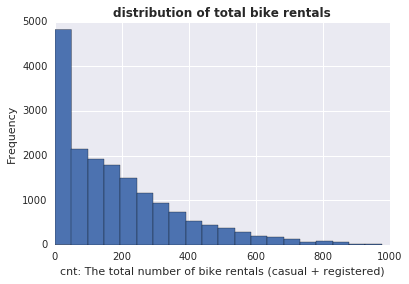

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64


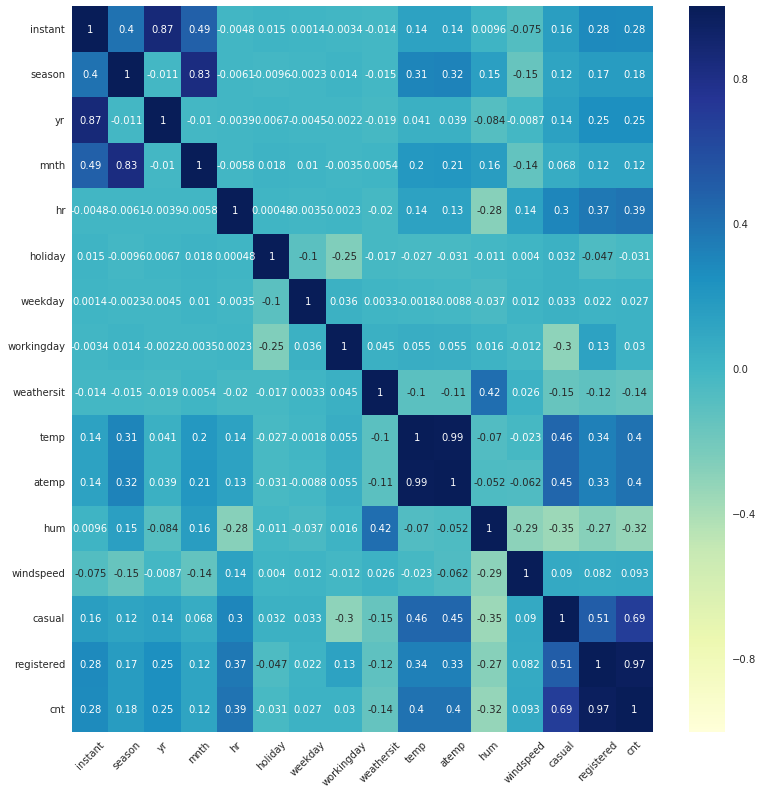

18339.645286090705
2834.7835481213674
3181.5162143587772
2078.3915619899617


'\nDEV CODE only\n'

In [2]:
# import inspect
# import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
"""
Introduction to the Dataset:
    Many U.S. cities have communal bike sharing stations where you can rent
    bicycles by the hour or day. Washington, D.C. is one of these cities.
    The District collects detailed data on the number of bicycles people rent
    by the hour and day.
Here are the descriptions for the relevant columns:
    instant - A unique sequential ID number for each row
    dteday - The date of the rentals
    season - The season in which the rentals occurred
    yr - The year the rentals occurred
    mnth - The month the rentals occurred
    hr - The hour the rentals occurred
    holiday - Whether or not the day was a holiday
    weekday - The day of the week (as a number, 0 to 7)
    workingday - Whether or not the day was a working day
    weathersit - The weather (as a categorical variable)
    temp - The temperature, on a 0-1 scale
    atemp - The adjusted temperature
    hum - The humidity, on a 0-1 scale
    windspeed - The wind speed, on a 0-1 scale
    casual - The number of casual riders (people who hadn't previously signed
                                          up with the bike sharing program)
    registered - The number of registered riders (people who had already
                                                  signed up)
    cnt - The total number of bike rentals (casual + registered)
"""
"""
Use the pandas library to read bike_rental_hour.csv into the
dataframe bike_rentals.
"""
# reference: https://datagy.io/python-get-set-working-directory/
## Reading in csv file
# cwd = os.getcwd()
# print('Current Working Directory is: ', cwd)
bike_rentals = pd.read_csv("bike_rental_hour.csv")
print(bike_rentals.head())
"""
Make a histogram of the cnt column of bike_rentals,
and take a look at the distribution of total rentals.
"""
%matplotlib inline
n_bins = 20
plt.hist(bike_rentals["cnt"],
         n_bins)
plt.title('distribution of total bike rentals',
          fontweight = "bold")
plt.xlabel('cnt: The total number of bike rentals (casual + registered)')
plt.ylabel('Frequency')
plt.show()

"""
Use the corr method on the bike_rentals dataframe to explore how each
column is correlated with cnt.
TO CODE: INSERT A CORRELATION HEATMAP HERE
"""
print(bike_rentals.corr()["cnt"])
plt.figure(figsize=(13, 13))
dataplot = sb.heatmap(bike_rentals.corr(), cmap="YlGnBu", annot=True)
plt.xticks(rotation = 45)
plt.show()
"""
Calculating Features:
    It can often be helpful to calculate features before applying machine
    learning models. Features can enhance the accuracy of models by
    introducing new information or distilling existing information.

    "hr" column in bike_rentals contains the hours during which bikes are
    rented, from 1 to 24. A machine treats each hour differently,
    without understanding that certain hours are related.
    We can introduce some order into the process by creating a
    new column with labels for morning, afternoon, evening, and night.
    This bundles similar times together, enabling the model to make
    better decisions.
    
    Apply the defined function to create a new attribute to provide
    bundle of hours such meaning:
        1: Morning
        2: Afternoon
        3: Evening
        4: Night
"""
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)
"""
Splitting the Data Into Train and Test Sets:
    Split the data into training and testing sets.
    This will enable you to train an algorithm using the training set,
    and evaluate its accuracy on the testing set.
"""
"""
## Error Metric to be applied:
    MSE works on continuous numeric data, which make sense to be used to
    evalate this dataset.

## Select 80% of the rows in bike_rentals to be part of the training set
using the sample method on bike_rentals.

## Test set data is those that is not in training set.
"""
train = bike_rentals.sample(frac=.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

"""
Applying Linear Regression:
    Linear regression should works fairly well on this data,
    given that many of the columns are highly correlated with "cnt".
    
    The good thing about linear regression is that it's fairly resistant
    to overfitting because it's straightforward compared to other
    machine learning approaches. It also can be prone to underfitting the
    data for the same reason.
    
    Need to ignore the "casual" and "registered" columns because "cnt" is
    derived from them.
"""
predictors = list(train.columns)
predictors.remove("cnt")  ## cnt - Target variable
predictors.remove("casual")  ## Directly related to target variable
predictors.remove("registered")  ## Directly related to target variable
predictors.remove("dteday")  ## dteday - The date of the rentals
"""
## Instantiate the "LinearRegression" class model.
## Fit with train set.
## Predict on test set.
## Calculate the error between the predictions and the actual values.
"""
reg = LinearRegression()
reg.fit(train[predictors], train["cnt"])
predictions = reg.predict(test[predictors])
print(np.mean((predictions - test["cnt"]) ** 2))
"""
Error Evaluation Write-up:
    High error MSE computed.
    
    Dataset includes few high outlier rental counts
    but otherwise mostly low counts.
    
    Larger errors are penalized more with MSE due to the squared nature,
    which leads to a higher total error.
"""
"""
Applying Decision Trees:
    Compare the decision tree algorithm error with the error from
    linear regression. Purpose is to enable the picking of right
    algorithm for this dataset.
    
    Decision trees tend to predict outcomes much more reliably than
    linear regression models, because a decision tree is a fairly
    complex model, it also tends to overfit, particularly when
    we don't tweak parameters like maximum depth and minimum number
    of samples per leaf. Decision trees are also prone to
    instability -- small changes in the input data can result
    in a very different output model.
"""
"""
## Instantiate the "DecisionTreeRegressor" class model.
## Fit with train set.
## Predict on test set.
## Calculate the error between the predictions and the actual values.
## Try different parameters eg.:
        - min_samples_leaf=5
        - min_samples_leaf=2
"""
reg = DecisionTreeRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])
predictions = reg.predict(test[predictors])
print(np.mean((predictions - test["cnt"]) ** 2))

reg = DecisionTreeRegressor(min_samples_leaf=2)
reg.fit(train[predictors], train["cnt"])
predictions = reg.predict(test[predictors])
print(np.mean((predictions - test["cnt"]) ** 2))
"""
Decision Tree Error Evaluation - Write-up:
    By taking the nonlinear predictors into account, the decision tree
    regressor appears to have much higher accuracy than linear regression,
    which is represented by the lower error term (ie. MSE applied here).
"""
"""
Applying Random Forests:
    Random forest algorithm typically is an improvement on the
    decision tree algorithm, as they are applied ensembles of the
    decision tree algorithm.
    
    Random forests tend to be much more accurate than simple models
    like linear regression. Due to the way random forests are
    constructed, they tend to overfit much less than decision trees.
    Random forests are prone to overfitting, so it's important to tune
    parameters like maximum depth and minimum samples per leaf.
"""
"""
## Instantiate the "RandomForestRegressor" class model.
## Fit with train set.
## Predict on test set.
## Calculate the error between the predictions and the actual values.
"""
reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])
predictions = reg.predict(test[predictors])
print(np.mean((predictions - test["cnt"]) ** 2))

"""
Random Forest Error Write-up:
    By removing some of the sources of overfitting on training data,
    the random forest accuracy is improved over the decision tree accuracy
    on test data.
"""




"""
DEV CODE only
"""
